* utiliser un decision tree pour la classification
* utiliser un neural network, en essayant de trouver les paramètres qui vont bien pour avoir la test error la plus faible
* utiliser les fonctions du tp d'avant pour représenter les images et voir ce que nos modèles prédises, pour voir si nos modèles sont pas mal ou s'ils trompent souvent

In [1]:
%config InlineBackend.figure_formats = ['retina']
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

# Load data

In [41]:
names = ['Ant', 'Grapes']

In [2]:
X_ant = np.load('./data/G_21_ant.npy')
X_grapes = np.load('./data/G_21_grapes.npy')

In [3]:
X_test = np.load('./data/test_images.npy')
y_test = np.load('./data/test_labels.npy')

Les data sets représentent des images dessinées en noir et blanc. Ils contiennent chacun $1000$ lignes et $784$ colonnes : $(1000, 784)$. Chaque colonne représente la couleur d'un pixel sur une échelle de gris de $0$ à $255$. Les $1000$ lignes correspondent à $1000$ images différentes. Les images ont une taille de $28\times28$, d'où les $784$ colonnes.

# Creates labels for ant and grapes

ant := label $0$ and grapes := label $1$

In [4]:
y_ant = np.zeros((X_ant.shape[0],))
y_grapes = np.ones((X_grapes.shape[0],))

# Merge the data into one matrix

In [5]:
X_train = np.concatenate((X_ant, X_grapes), axis=0)

In [6]:
y_train = np.concatenate((y_ant, y_grapes), axis=0)

# Use SVM to separate data

## SVC with linear kernel

In [7]:
clf_lin = SVC(kernel='linear', C=1)
clf_lin.fit(X_train, y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [8]:
clf_lin.score(X_test, y_test)

0.716

## SVC with gaussian kernel

In [9]:
clf_rbf = SVC(kernel='rbf', C=1)
clf_rbf.fit(X_train, y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [10]:
clf_rbf.score(X_test, y_test)

0.869

## Use cross validation to choose the best parameters for the linear kernel (C) and for the gaussian kernel ($\gamma$ & C)

# Use perceptron to separate the data

In [11]:
clf_p = Perceptron(tol=1e-3, random_state=1)
clf_p.fit(X_train, y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=1, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [12]:
clf_p.score(X_test, y_test)

0.73

# Use PCA to reduce the dimension of the data

Before using PCA, we need to standardise the data (mean=0, variance=1)

In [13]:
# Standardise the X_train and X_test
X_s_train = StandardScaler().fit_transform(X_train)
X_s_test = StandardScaler().fit_transform(X_test)

In [14]:
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X_s_train)
X_test_2d = pca.fit_transform(X_s_test)

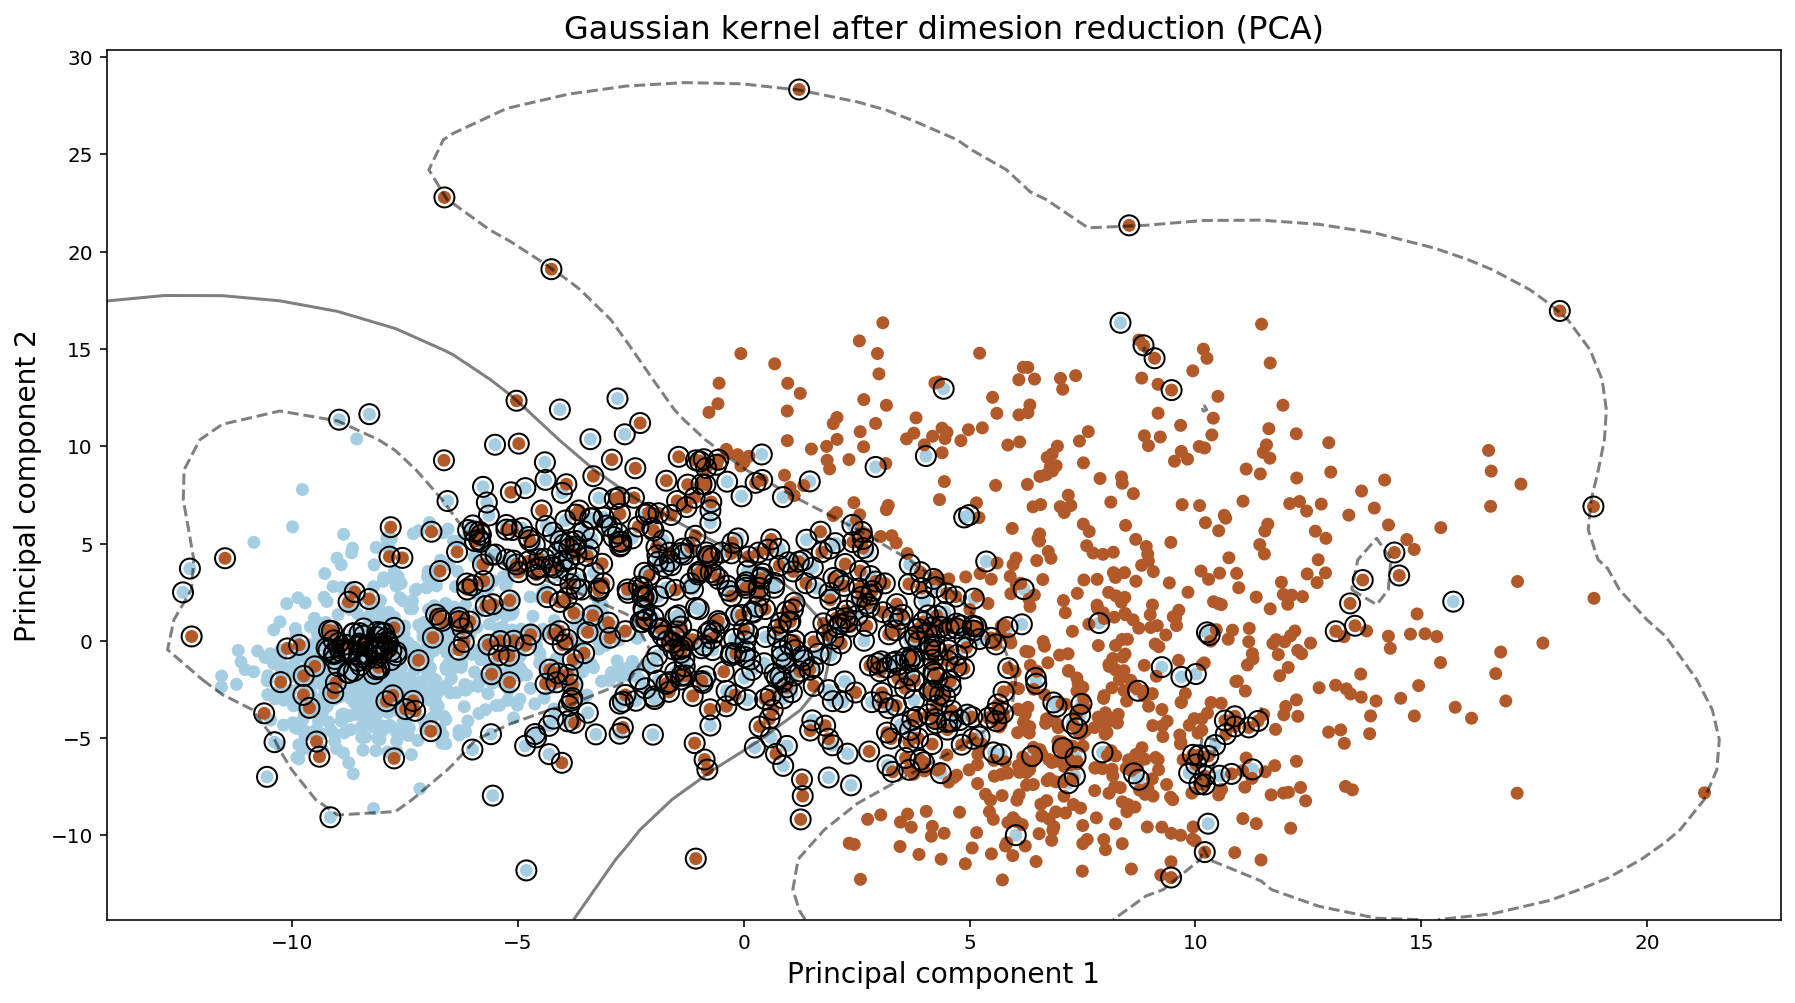

In [50]:
clf_pca = SVC(kernel='rbf', C=1, degree=6)
clf_pca.fit(X_2d, y_train)
percep_pca = Perceptron(tol=1e-3, random_state=1)
percep_pca.fit(X_2d, y_train)
plt.figure(figsize=(15,8))
# plot the results in 2D to better understand the distribution of the data, plot with two different colors to see the classes
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y_train, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf_pca.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf_pca.support_vectors_[:, 0], clf_pca.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k')
plt.title('Gaussian kernel after dimesion reduction (PCA)', size=16)
plt.xlabel('Principal component 1', size=14)
plt.ylabel('Principal component 2', size=14)
plt.show()

Donc les données ne semblent pas trop linéairement séparables, ce qui peut expliquer pourquoi on obtient le meilleur score avec le noyau gaussien 

In [16]:
clf_pca.score(X_test_2d, y_test)

0.815

# Test of several classification algorithms

## KNN

In [17]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [18]:
neigh.score(X_test, y_test)

0.845

## Logistic regression

In [26]:
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression(random_state = 1, max_iter=100)
lr_clf.fit(X_train, y_train)

/Users/Victor/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
lr_clf.score(X_test, y_test)

0.698

## Naive Bayes

In [28]:
from sklearn.naive_bayes import GaussianNB
nb_clf= GaussianNB()
nb_clf.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [31]:
nb_clf.score(X_test, y_test)

0.783

## RandomForest regression

In [32]:
from sklearn.ensemble import RandomForestRegressor
rf_clf = RandomForestRegressor(n_estimators = 10, random_state = 1)
rf_clf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [33]:
rf_clf.score(X_test, y_test)

0.469

## Decision Tree

In [34]:
from sklearn.tree import DecisionTreeClassifier
dec_clf = DecisionTreeClassifier()
dec_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [35]:
dec_clf.score(X_test, y_test)

0.736

Dans l'ensemble tous les algorithmes sont moins bon que SVM avec gaussian kernel, y'a juste KNN qui a quand même un plutôt bon score, avec de la cross-validation on peut peut-être faire un truc bien sinon les autres pas sûr qu'ils soient super utiles.